# Uczenie maszynowe <br> Zadanie domowe nr 1: Klasyfikacja wektorów nośnych i regresja logistyczna - z elementami konkursu
Politechnika Gdańska, Wydział ETI, Katedra Inżynierii Biomedycznej

# Cel:
Opracować procedurę złożoną z przetwarzania wstępnego oraz klasyfikacji danych w celu uzyskania jak najlepszych wyników klasyfikacji dla zadanego zbioru danych.

# Problem:
Dla zbioru CIFAR-10 należy wybrać przykłady dla wskazanych 3 klas. Następnie opracować procedurę w celu uzyskania najlepszych wyników klasyfikacji mierzonych z użyciem miary F1-score, F1 = 2(recall*precision)/(recall+precision). Do wyznaczenia wartości miary należy zastosować funkcję f1_score z pakietu scikit-learn (from sklearn.metrics import f1_score).

# Dane studentów
imię, nazwisko, numer indeksu, dane grupy, data, <br>

In [1]:
# Download data and select classes 'plane', 'cat', 'truck'

import random

from keras.datasets import cifar10
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, classification_report

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

indexes = [0, 3, 9]

idx_train = np.array([idx for idx in range(y_train.shape[0]) if y_train[idx] in indexes])
idx_test = np.array([idx for idx in range(y_test.shape[0]) if y_test[idx] in indexes])

x_train_r = x_train[idx_train]
y_train_r = y_train[idx_train]

x_test_r = x_test[idx_test]
y_test_r = y_test[idx_test]

In [2]:
# Preprocessing

x_train_flat = x_train_r.reshape((x_train_r.shape[0], x_train_r.shape[1]*x_train_r.shape[2]*x_train_r.shape[3]))
x_test_flat = x_test_r.reshape((x_test_r.shape[0], x_test_r.shape[1]*x_test_r.shape[2]*x_test_r.shape[3]))

x_train_flat = x_train_flat.astype('float32')/255.0
x_test_flat = x_test_flat.astype('float32')/255.0

pca =  PCA(n_components=5)
pca.fit(x_train_flat)
x_train_flat_pca = pca.transform(x_train_flat)
x_test_flat_pca = pca.transform(x_test_flat)

X_tr = x_train_flat_pca
X_te = x_test_flat_pca

In [3]:
# Classification

model = SVC(kernel='rbf', decision_function_shape='ovo', C=1, gamma="auto")
model.fit(X_tr, y_train_r.ravel())

pred_train = model.predict(X_tr)

accuracy_train = model.score(X_tr, y_train_r)
print(f"Accuracy: {accuracy_train}")

print("Confusion matrix:")
conf_matrix_train = confusion_matrix(y_train_r, pred_train)
print(conf_matrix_train)

f1_score_train = f1_score(y_train_r, pred_train, average="weighted")
print(f"F1 score: {f1_score_train}")

target_names = ['plane', 'cat', 'truck']
print("Classification report:")
classification_report_train = classification_report(y_train_r, pred_train, target_names=target_names)
print(classification_report_train)

Accuracy: 0.8146
Confusion matrix:
[[3973  406  621]
 [ 274 4244  482]
 [ 440  558 4002]]
F1 score: 0.814620808058975
Classification report:
              precision    recall  f1-score   support

       plane       0.85      0.79      0.82      5000
         cat       0.81      0.85      0.83      5000
       truck       0.78      0.80      0.79      5000

    accuracy                           0.81     15000
   macro avg       0.82      0.81      0.81     15000
weighted avg       0.82      0.81      0.81     15000



In [4]:
# Validation

pred_test = model.predict(X_te)

accuracy_test = model.score(X_te, y_test_r)
print(f"Accuracy: {accuracy_test}")

print("Confusion matrix:")
conf_matrix_test = confusion_matrix(y_test_r, pred_test)
print(conf_matrix_test)

f1_score_test = f1_score(y_test_r, pred_test, average="weighted")
print(f"F1 score: {f1_score_test}")

print("Classification report:")
classification_report_test = classification_report(y_test_r, pred_test, target_names=target_names)
print(classification_report_test)

Accuracy: 0.6613333333333333
Confusion matrix:
[[655 155 190]
 [103 732 165]
 [176 227 597]]
F1 score: 0.6605196606399658
Classification report:
              precision    recall  f1-score   support

       plane       0.70      0.66      0.68      1000
         cat       0.66      0.73      0.69      1000
       truck       0.63      0.60      0.61      1000

    accuracy                           0.66      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.66      0.66      0.66      3000



Class names: ['plane', 'cat', 'truck']
Predicted class code: [3]
Predicted class label: cat
Scores for each class: [[-0.50568114 -0.0100872   0.63109831]]
True label: cat


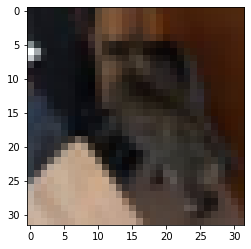

In [5]:
test_example_id = random.randrange(len(idx_test))
size = X_te.shape[1]
t = (X_te[test_example_id]).reshape((1,size))

pred_t = model.predict(t)

print(f"Class names: {target_names}")
print(f"Predicted class code: {pred_t}")
print(f"Predicted class label: {class_names[pred_t[0]]}")

scores = model.decision_function(t)
print(f"Scores for each class: {scores}")

example_test_true_label = class_names[y_test[idx_test[test_example_id]][0]]
print(f"True label: {example_test_true_label}")

example_test_image = x_test[idx_test[test_example_id],:,:,:]
plt.imshow(example_test_image)
plt.show()

In [ ]:
# Extra validation

In [ ]:
# enter your data
X_test = ''
y_test_reduced = ''

pred_test_extra = model.predict(X_test)

accuracy_test_extra = model.score(X_test, y_test_reduced)
print(f"Accuracy: {accuracy_test_extra}")

print("Confusion matrix:")
conf_matrix_test_extra = confusion_matrix(y_test_reduced, pred_test_extra)
print(conf_matrix_test_extra)

f1_score_test_extra = f1_score(y_test_reduced, pred_test_extra, average="weighted")
print(f"F1 score: {f1_score_test_extra}")

print("Classification report:")
classification_report_test_extra = classification_report(y_test_reduced, pred_test_extra, target_names=target_names)
print(classification_report_test_extra)